<h1>Time Series Transformation</h1>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


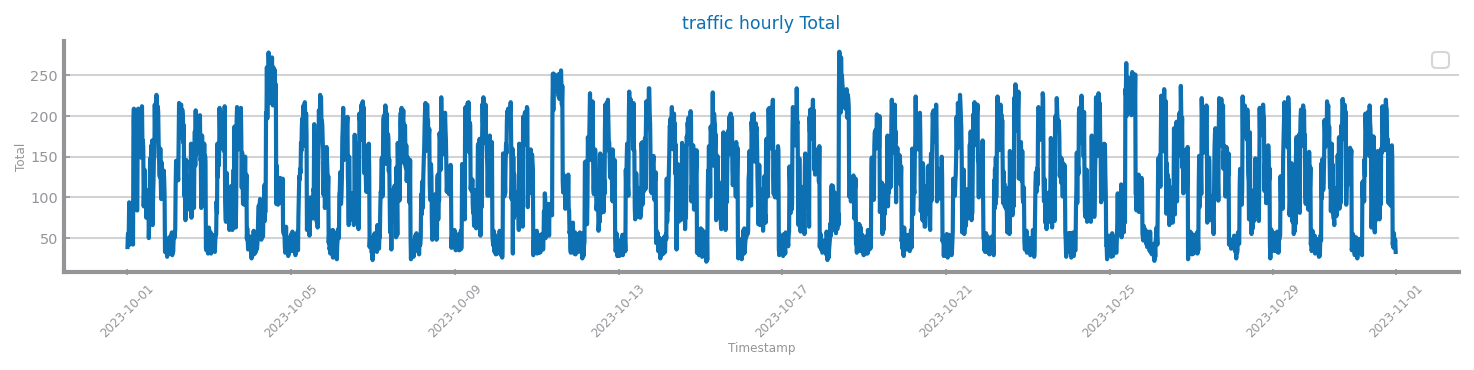

In [1]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

file_tag = "traffic"
filename = "../../../data/forecast_traffic_single.csv"
index = "Timestamp"
target = "Total"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} hourly {target}",
)
show()

<h2 align="center">Smoothing</h2>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


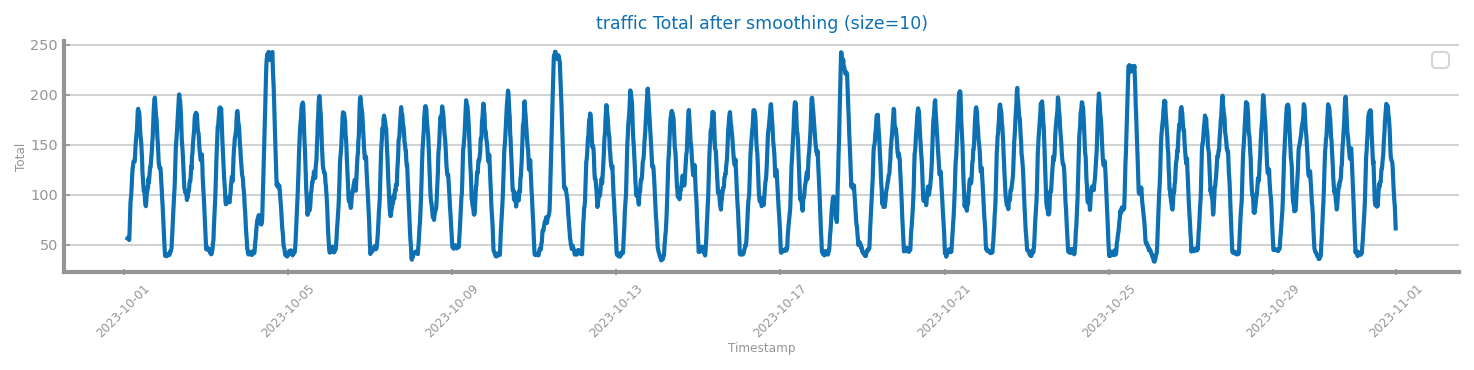

In [2]:
WIN_SIZE = 10
ss_smooth: Series = series.rolling(window=WIN_SIZE).mean()

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_smooth.index.to_list(),
    ss_smooth.to_list(),
    xlabel=ss_smooth.index.name,
    ylabel=target,
    title=f"{file_tag} {target} after smoothing (size={WIN_SIZE})",
)
show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

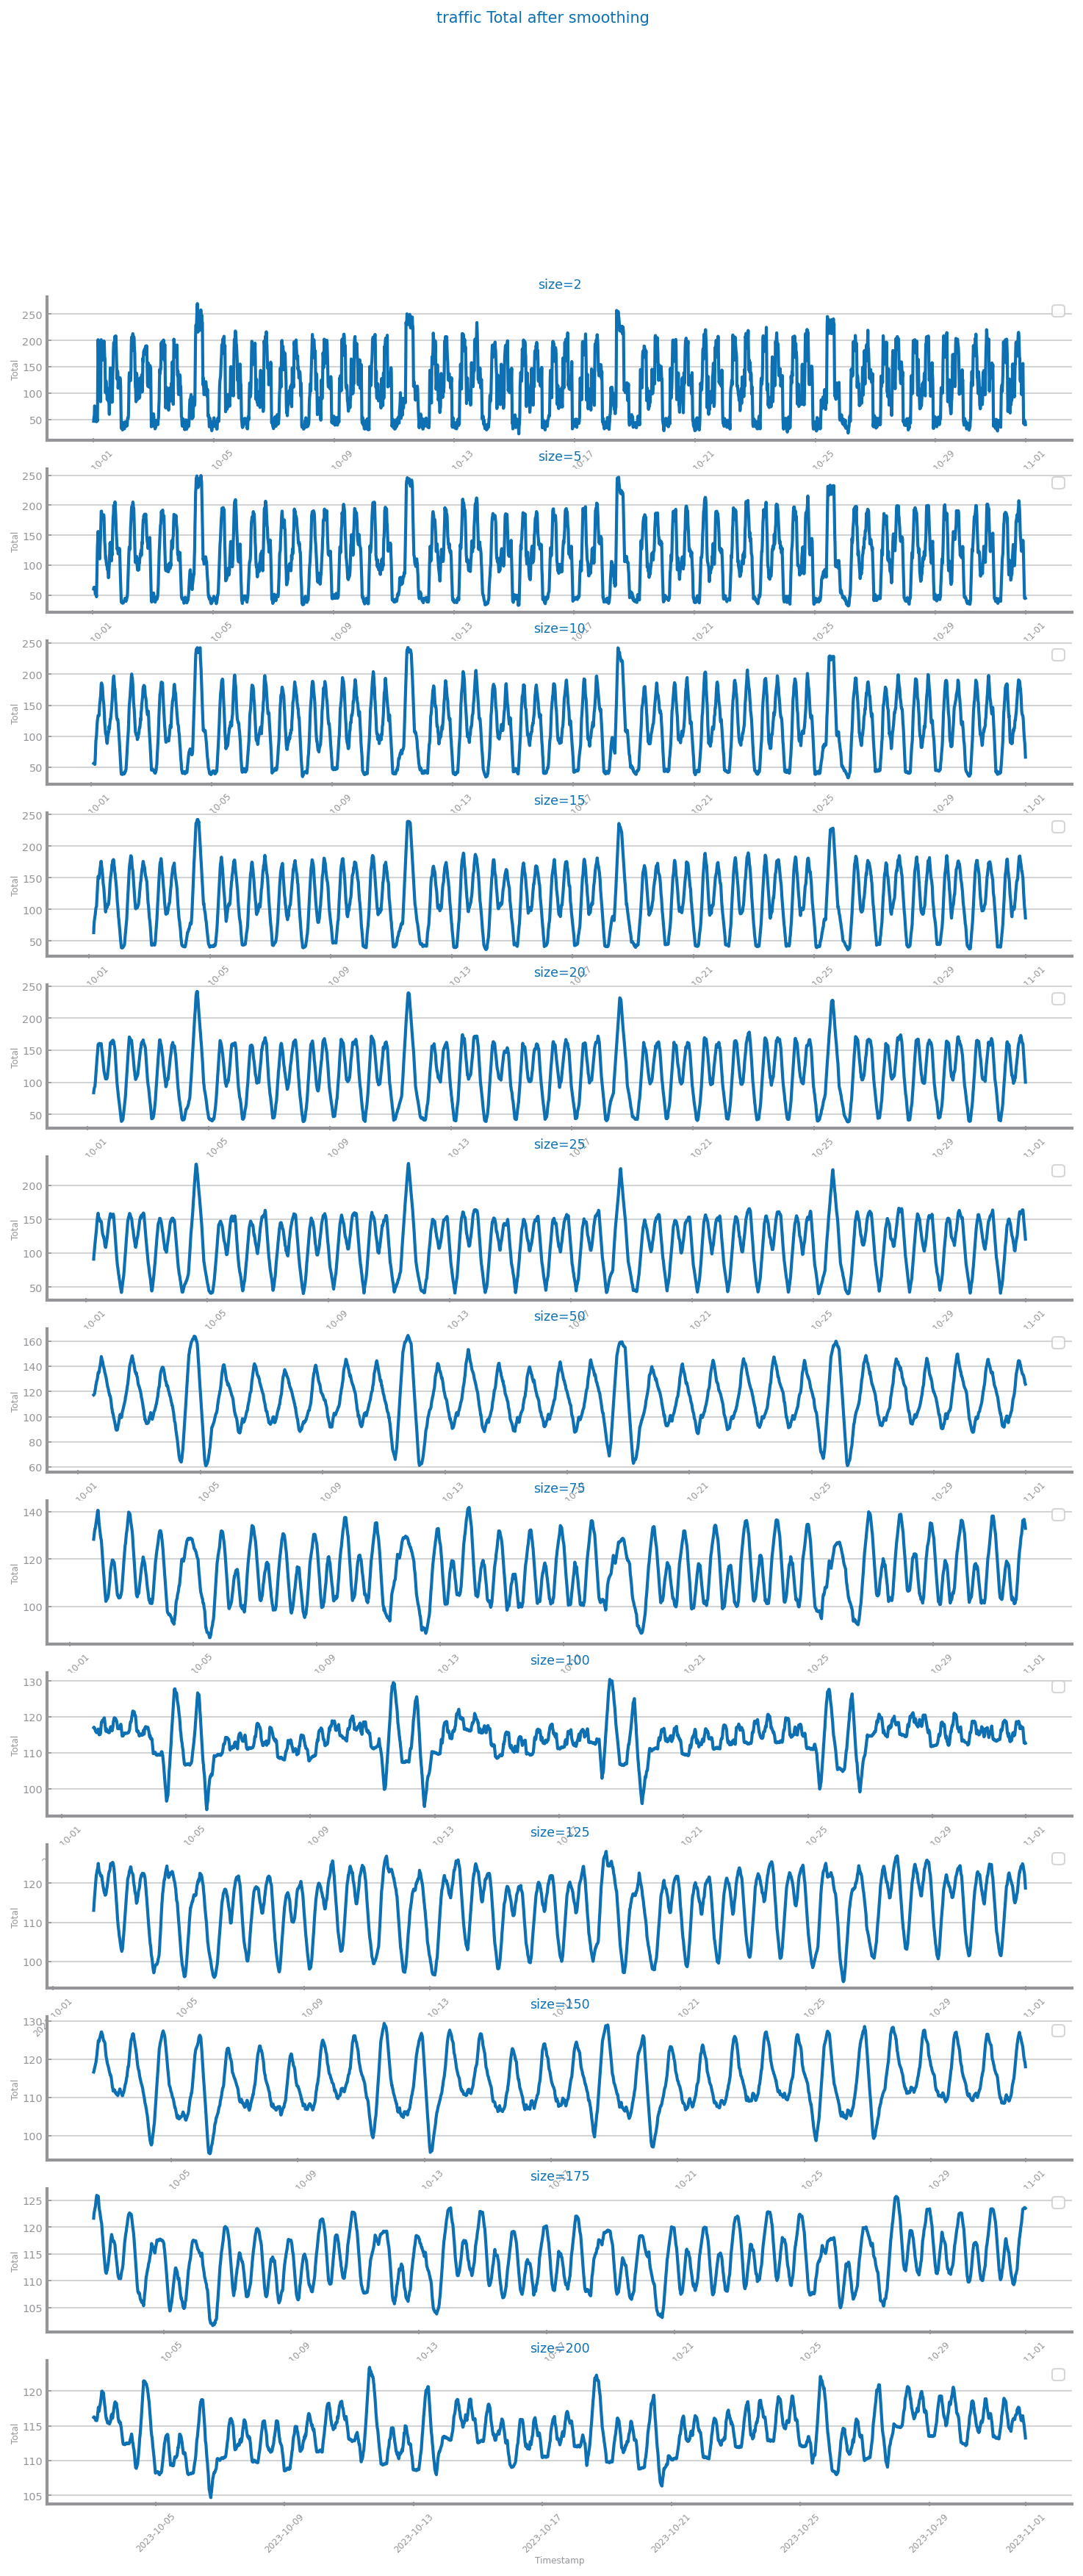

In [3]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

sizes: list[int] = [2, 5, 10, 15, 20, 25, 50, 75, 100, 125, 150, 175, 200]
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(sizes), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} {target} after smoothing")

for i in range(len(sizes)):
    ss_smooth: Series = series.rolling(window=sizes[i]).mean()
    plot_line_chart(
        ss_smooth.index.to_list(),
        ss_smooth.to_list(),
        ax=axs[i],
        xlabel=ss_smooth.index.name,
        ylabel=target,
        title=f"size={sizes[i]}",
    )
show()

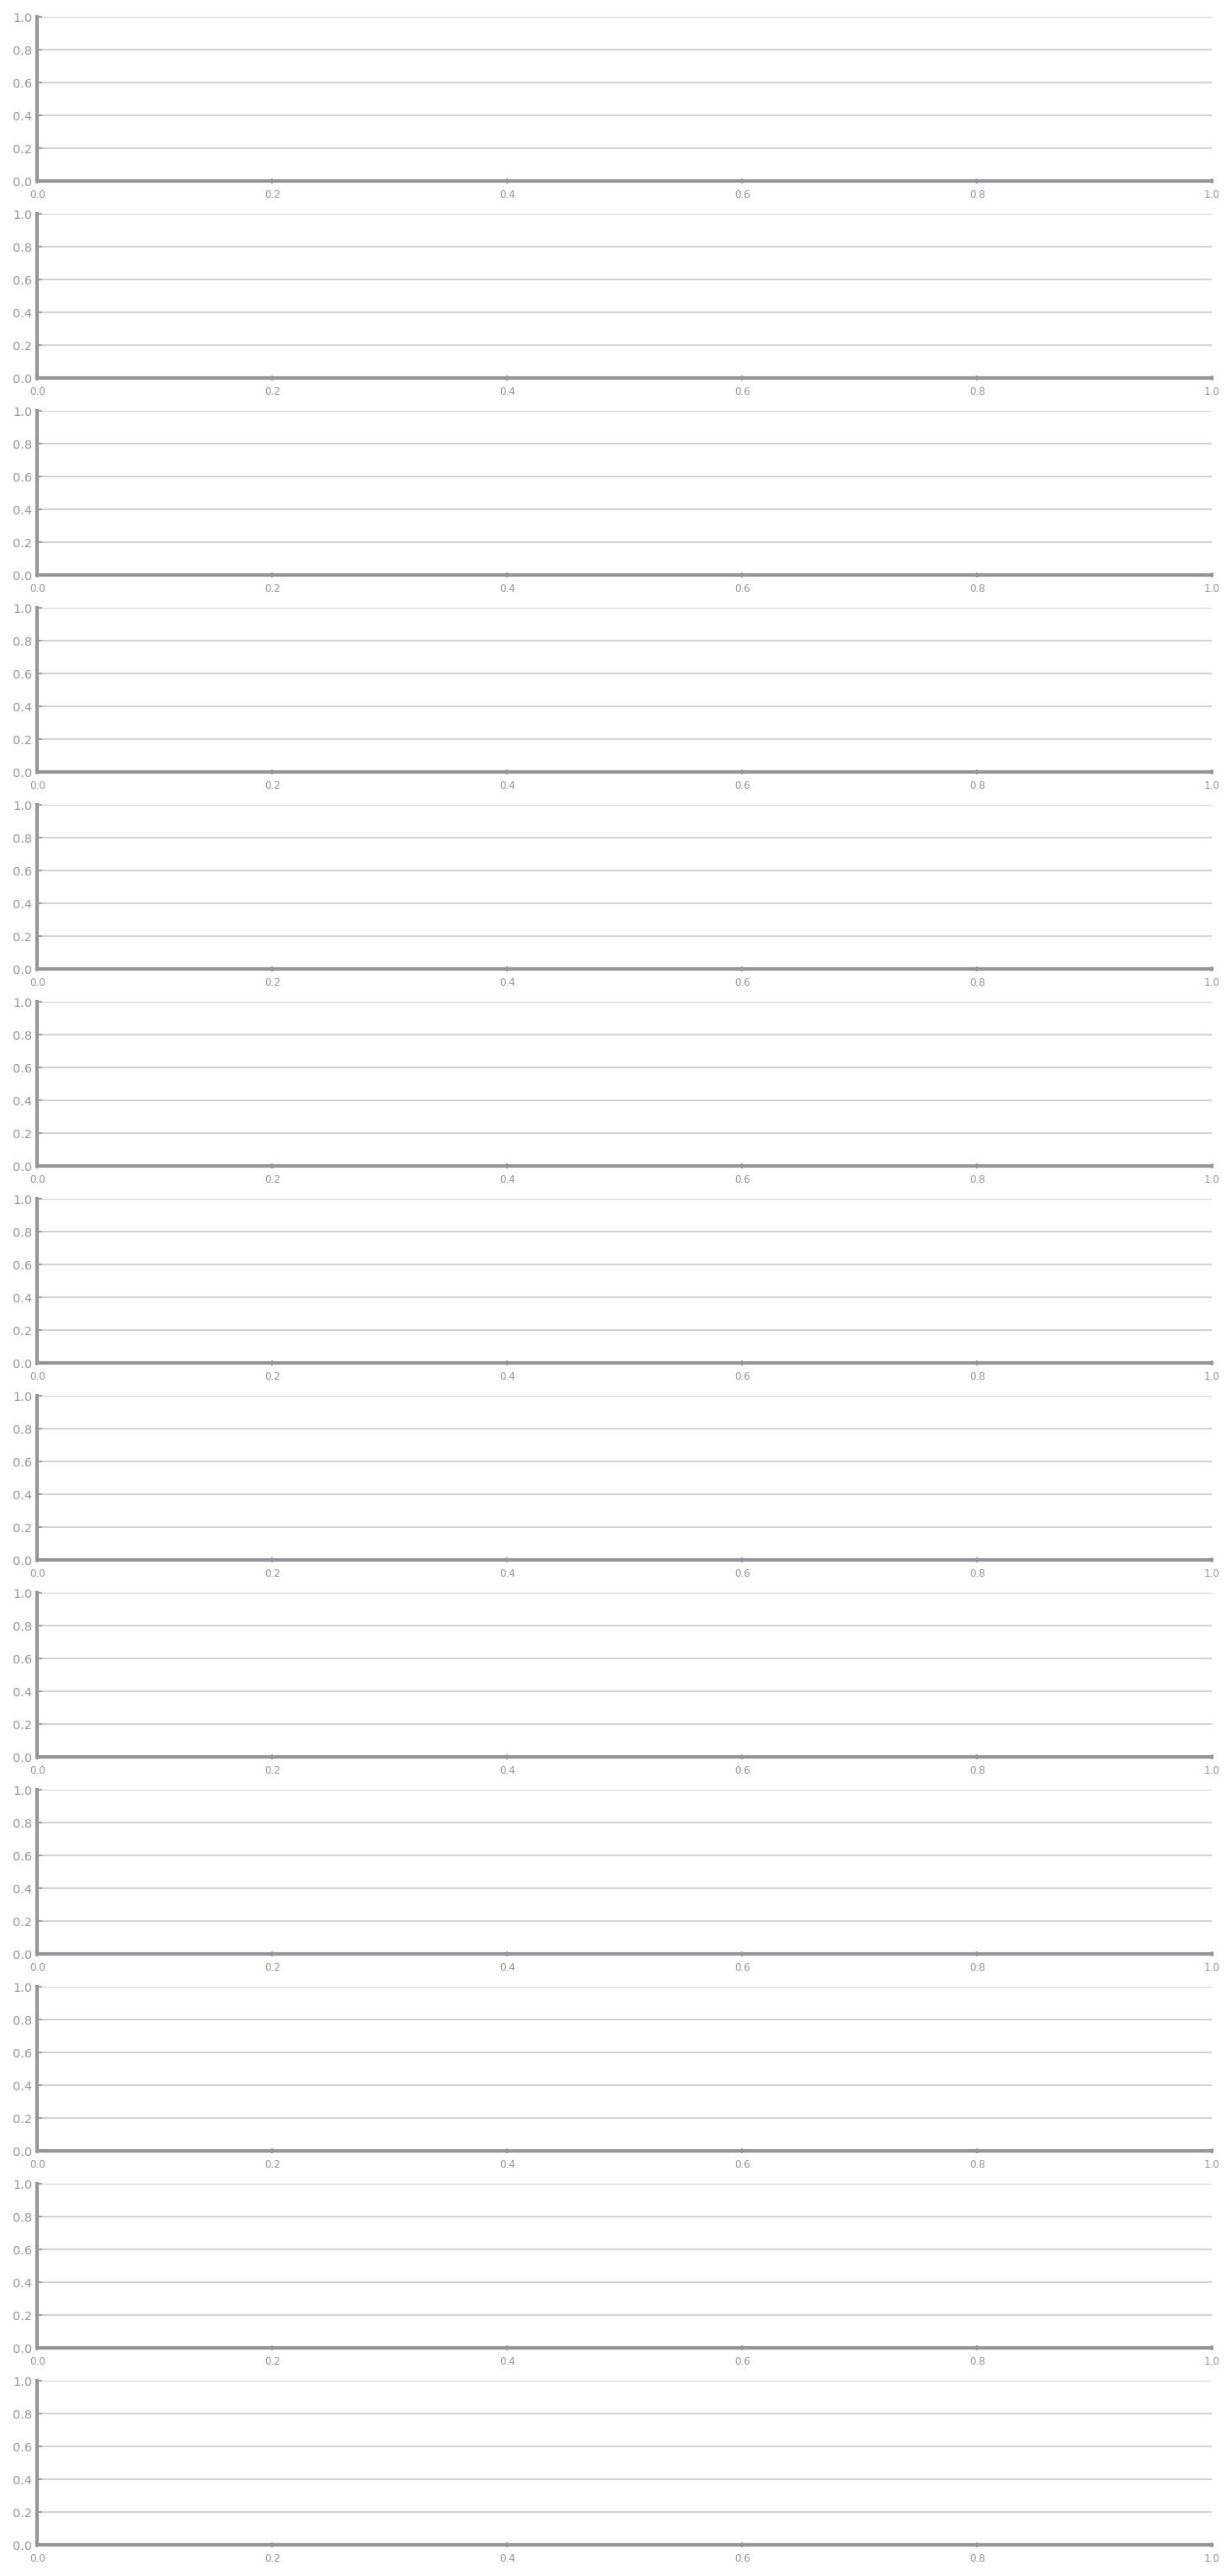

<Figure size 1800x300 with 0 Axes>

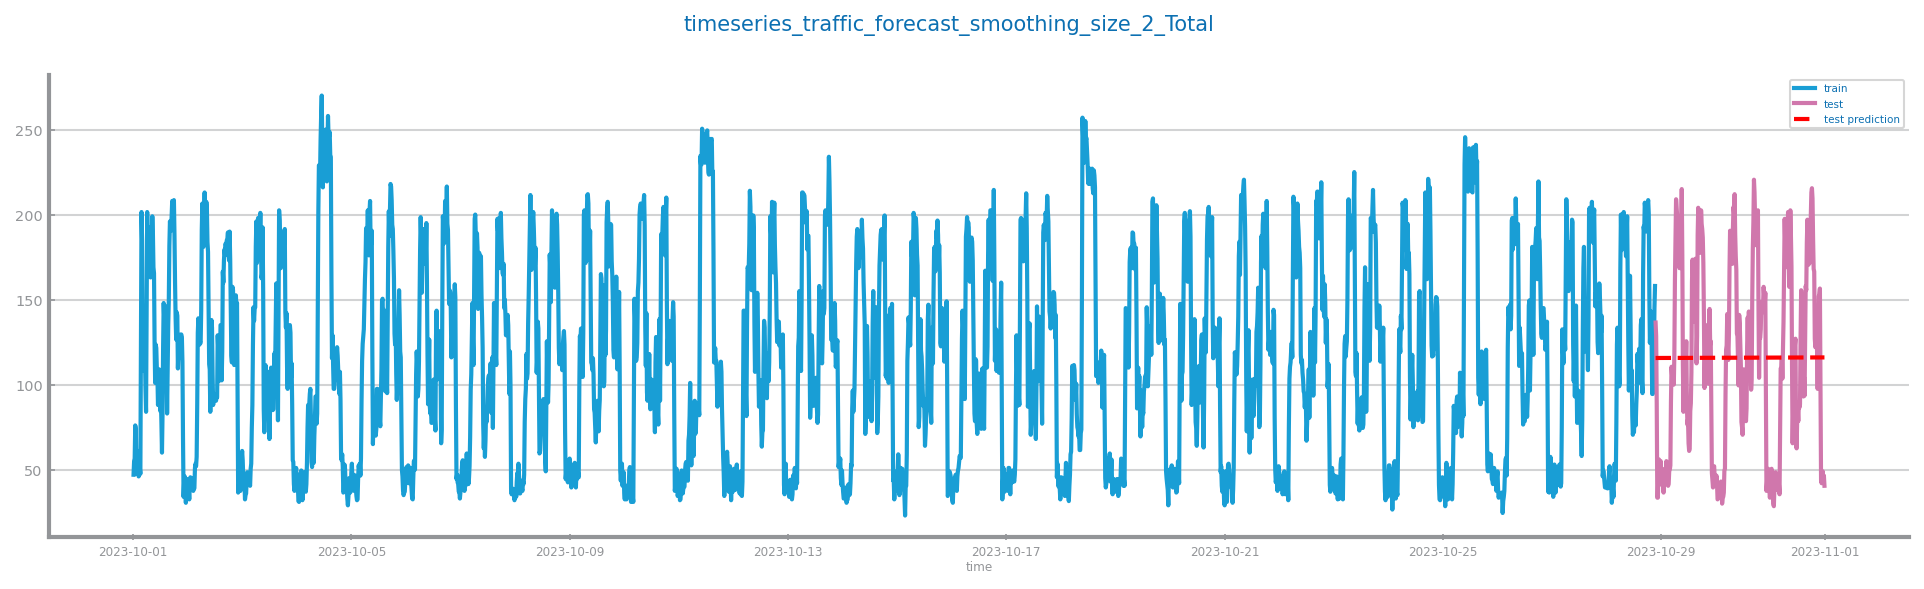

<Figure size 1800x300 with 0 Axes>

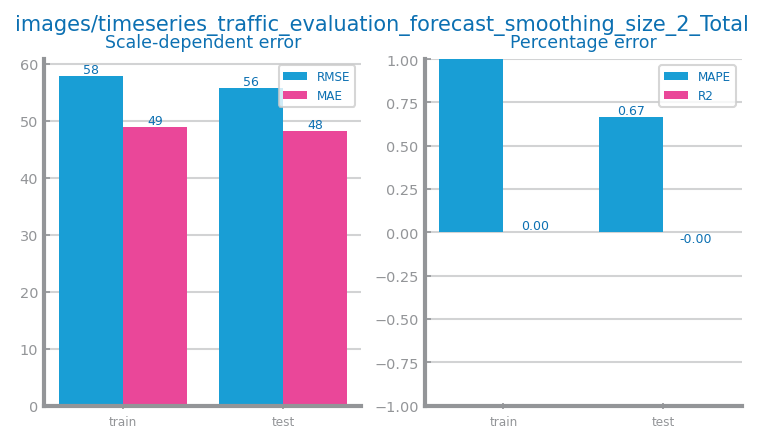

<Figure size 1800x300 with 0 Axes>

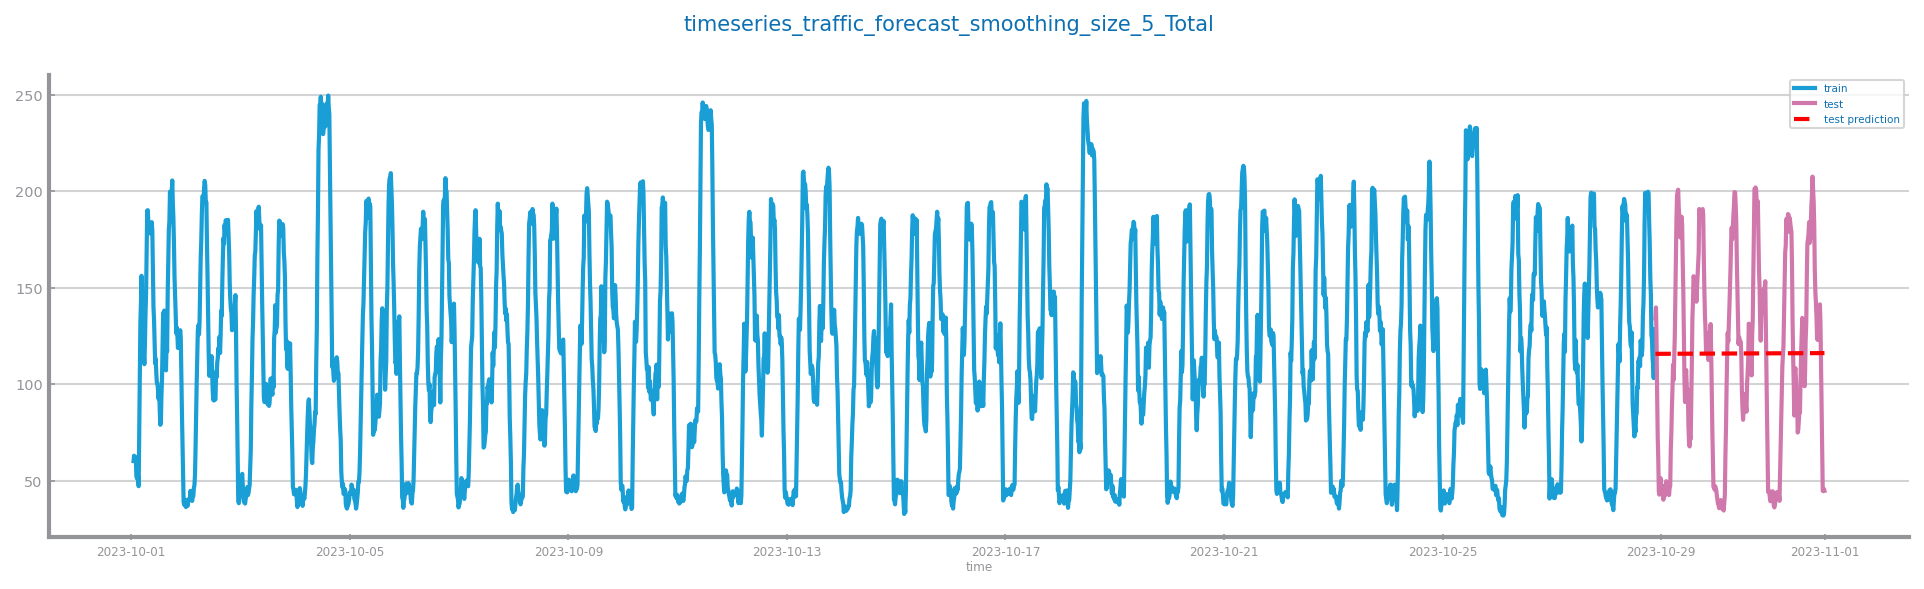

<Figure size 1800x300 with 0 Axes>

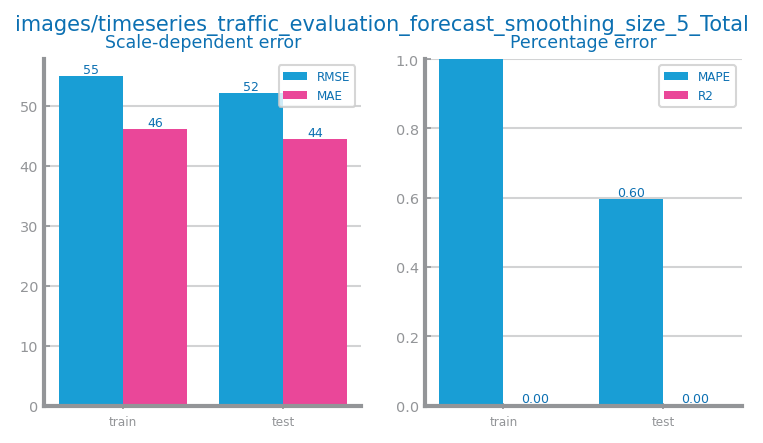

<Figure size 1800x300 with 0 Axes>

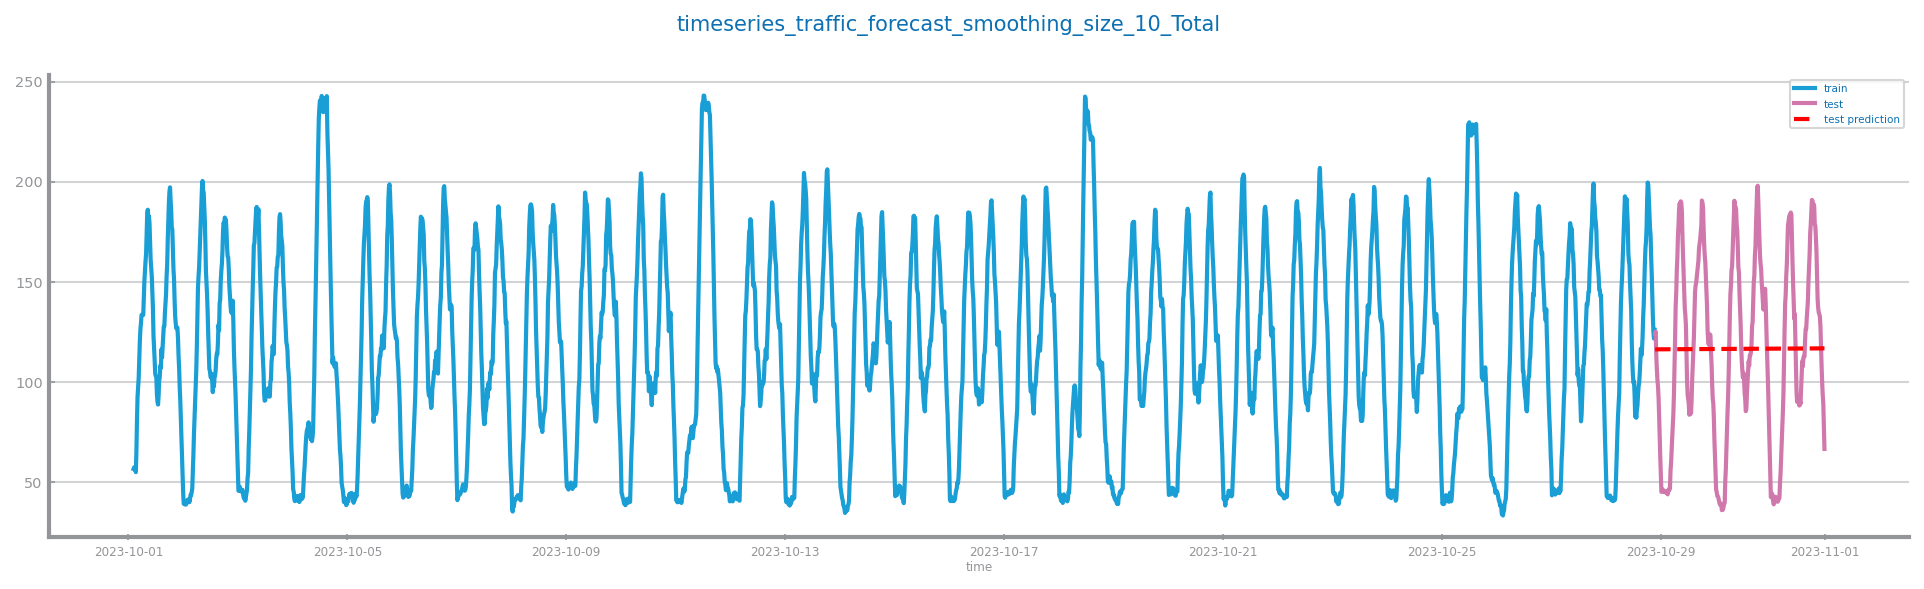

<Figure size 1800x300 with 0 Axes>

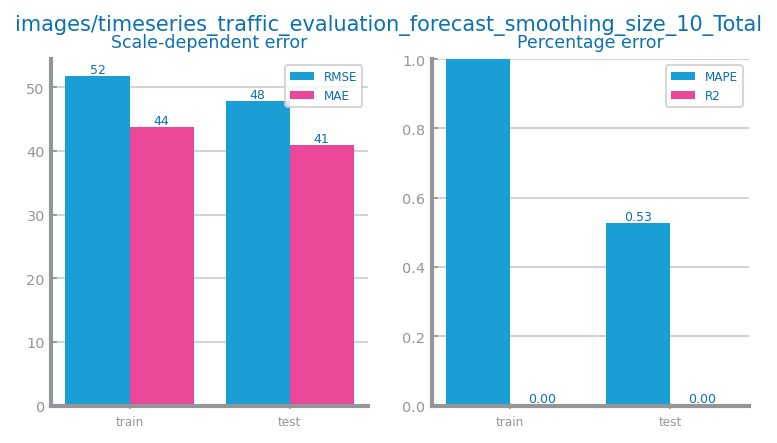

<Figure size 1800x300 with 0 Axes>

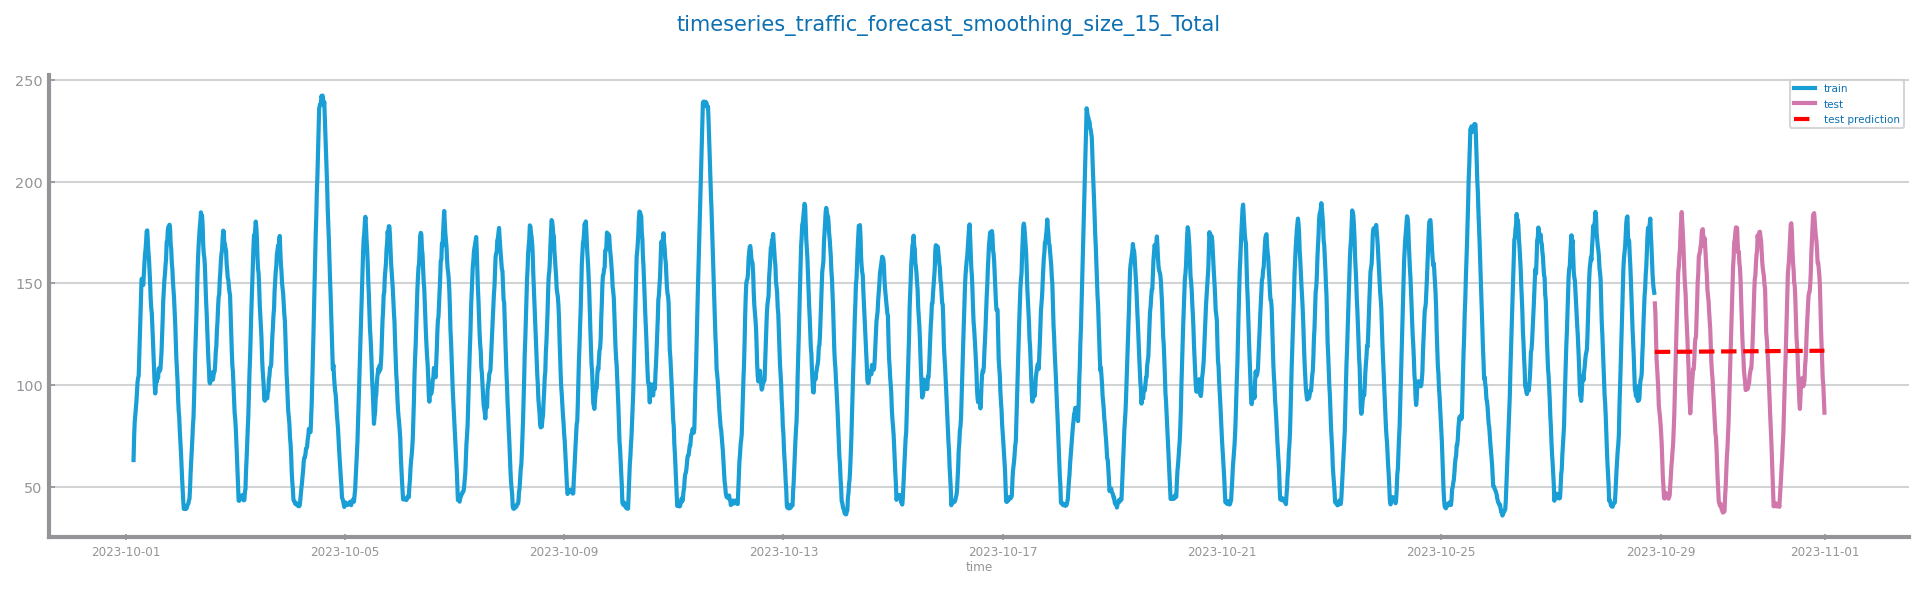

<Figure size 1800x300 with 0 Axes>

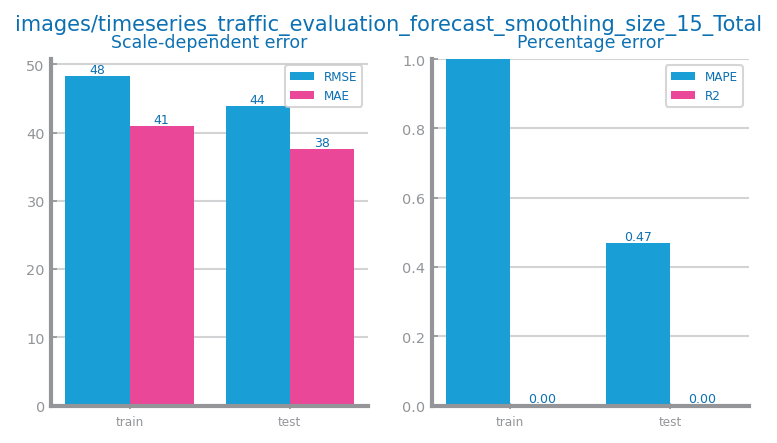

<Figure size 1800x300 with 0 Axes>

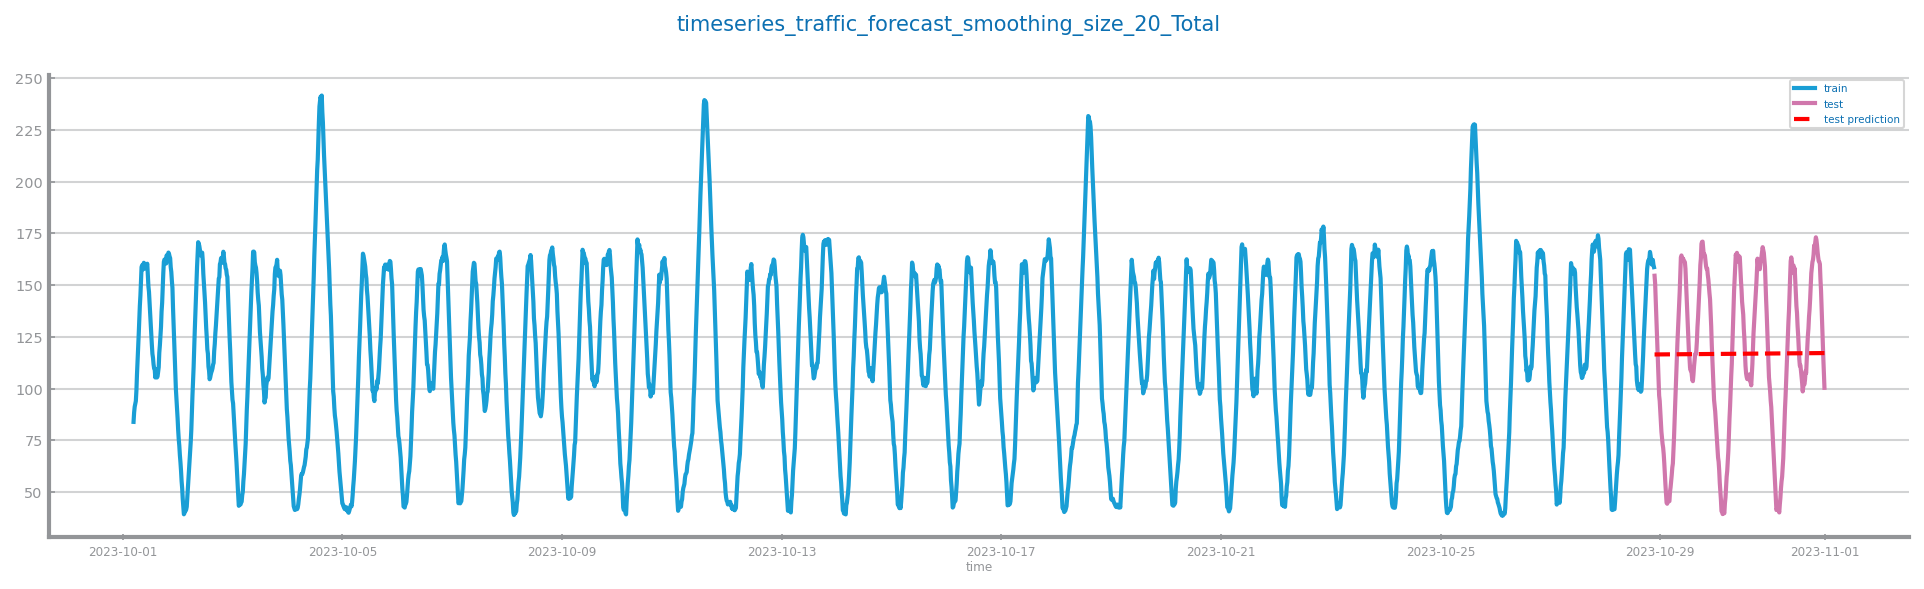

<Figure size 1800x300 with 0 Axes>

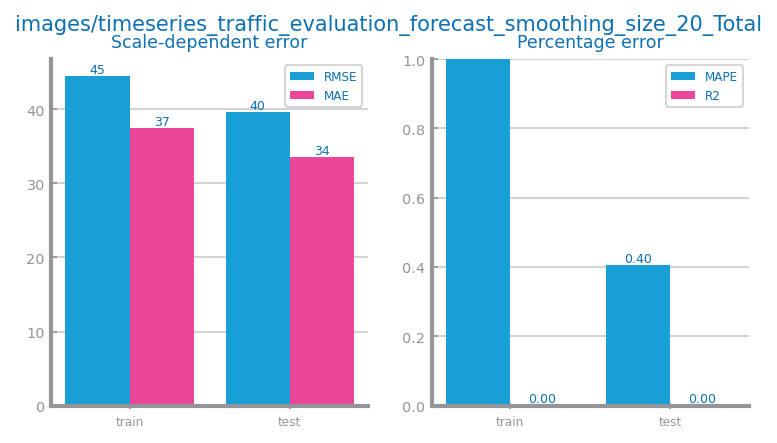

<Figure size 1800x300 with 0 Axes>

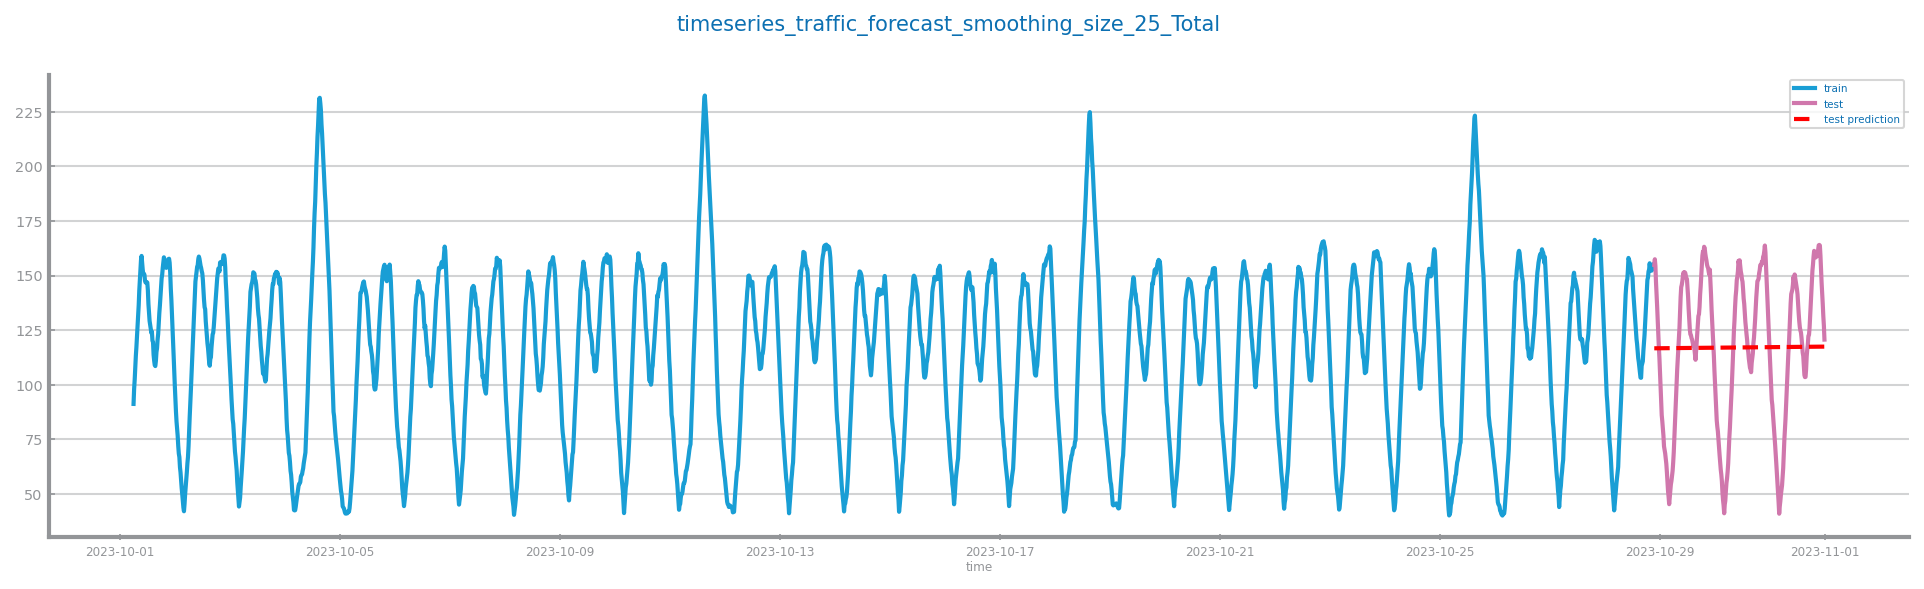

<Figure size 1800x300 with 0 Axes>

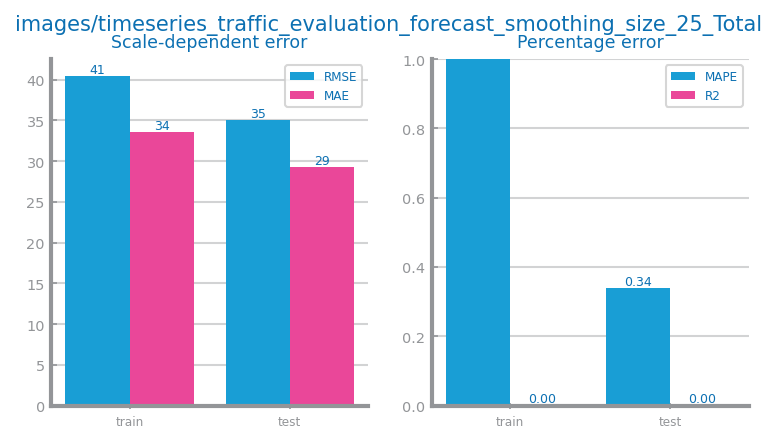

<Figure size 1800x300 with 0 Axes>

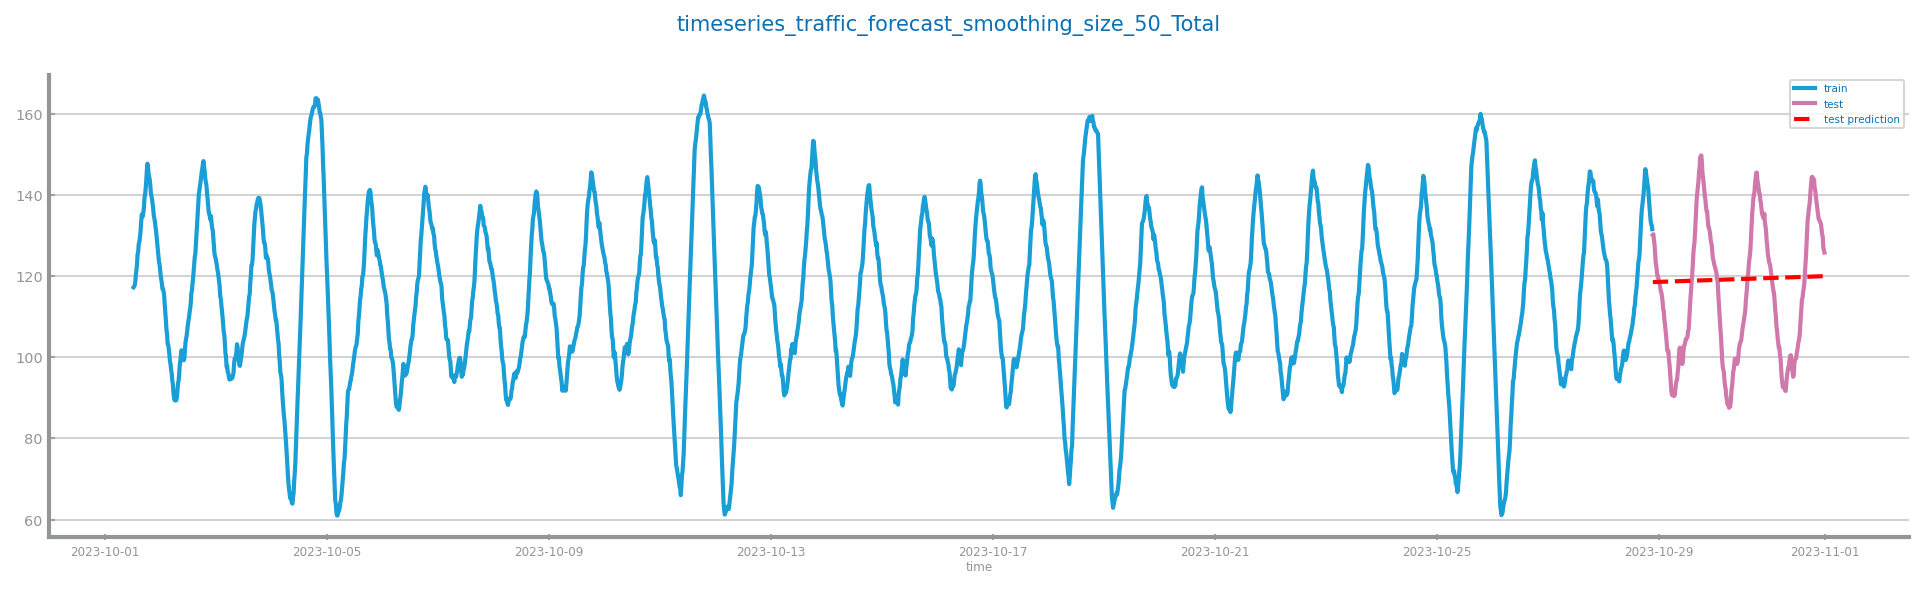

<Figure size 1800x300 with 0 Axes>

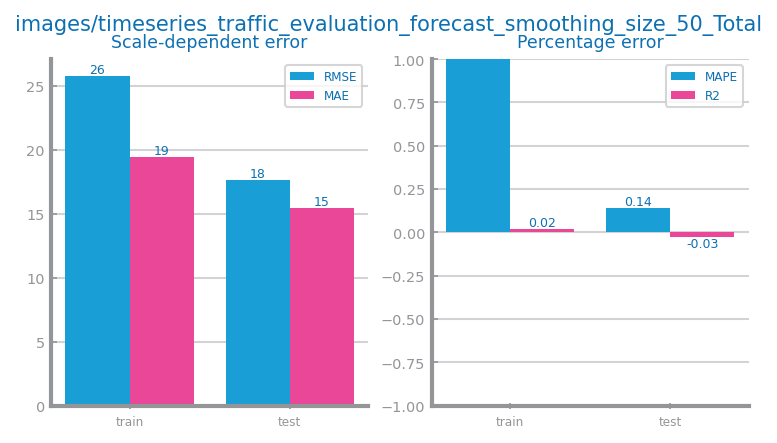

<Figure size 1800x300 with 0 Axes>

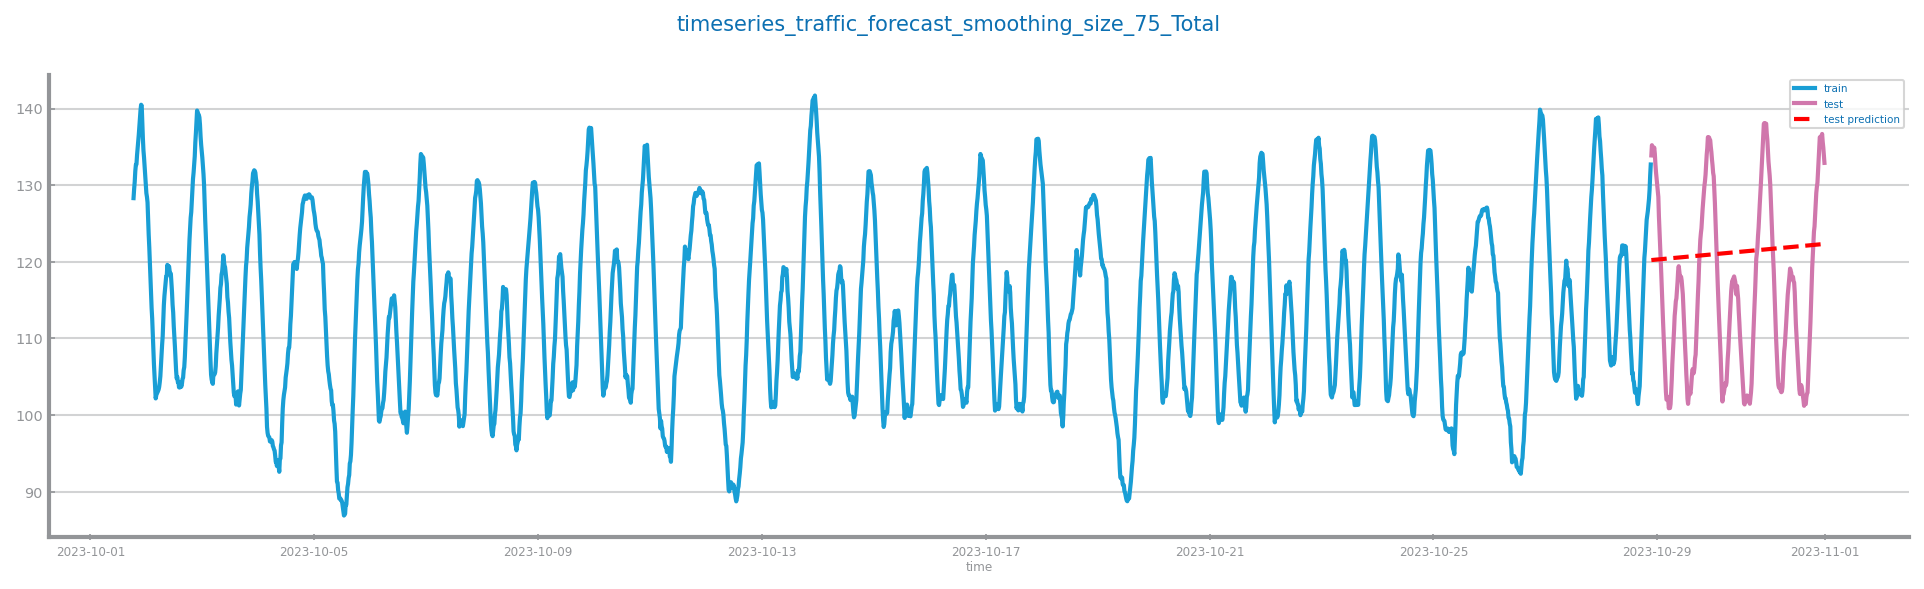

<Figure size 1800x300 with 0 Axes>

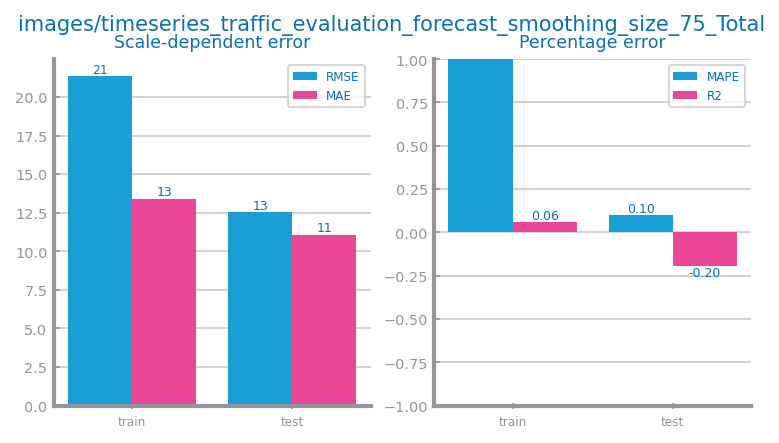

<Figure size 1800x300 with 0 Axes>

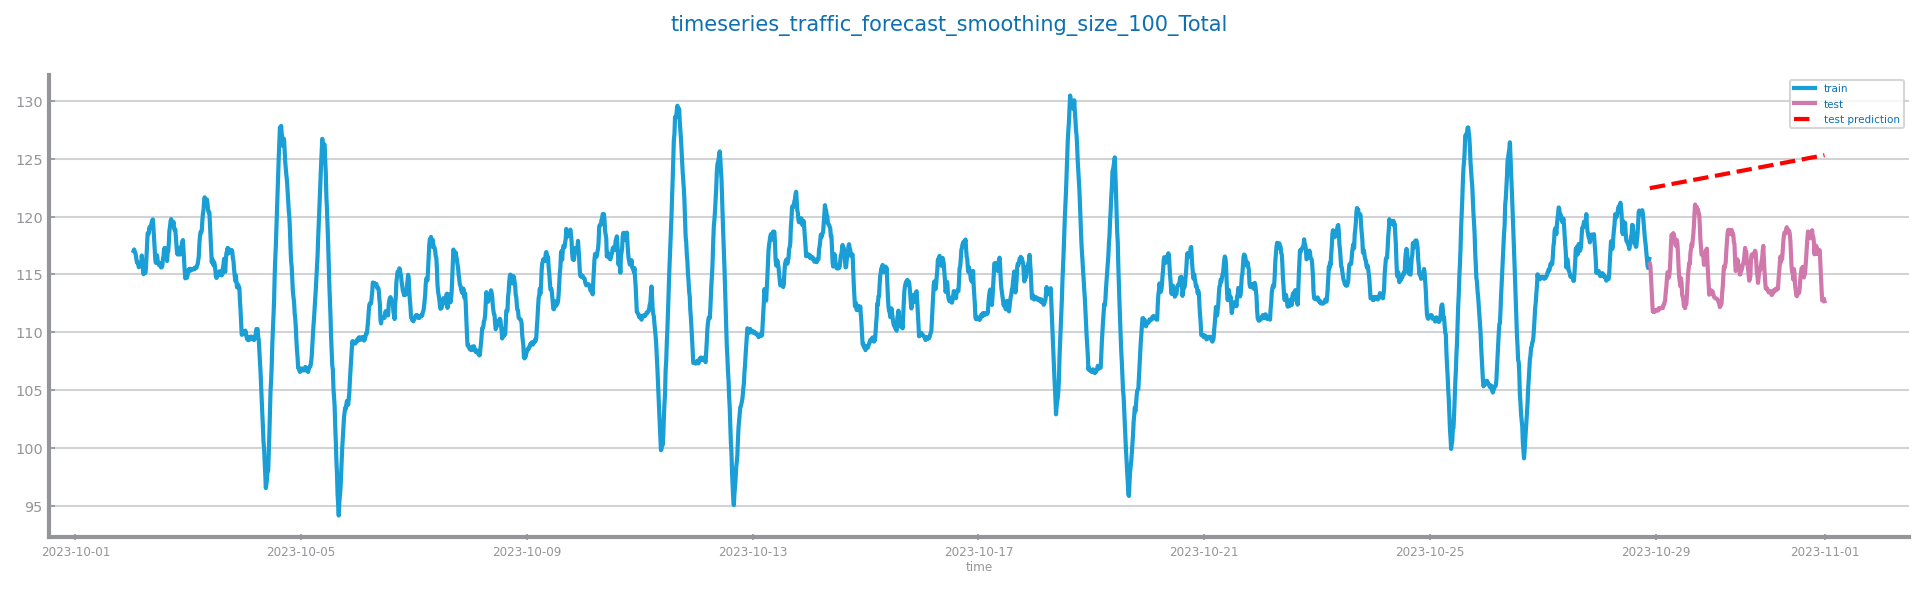

<Figure size 1800x300 with 0 Axes>

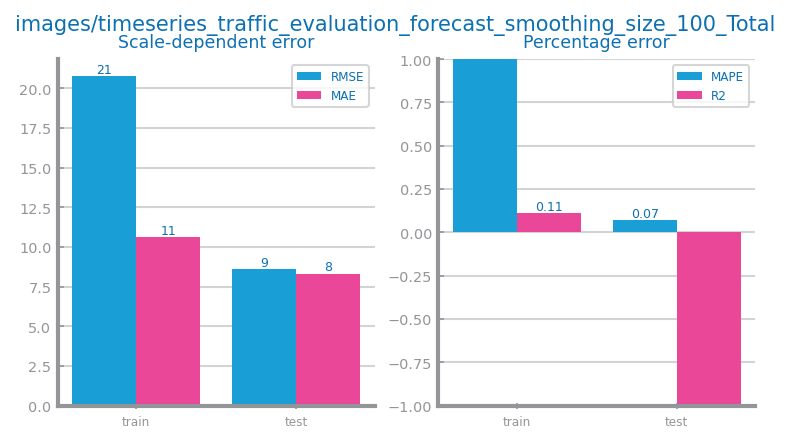

<Figure size 1800x300 with 0 Axes>

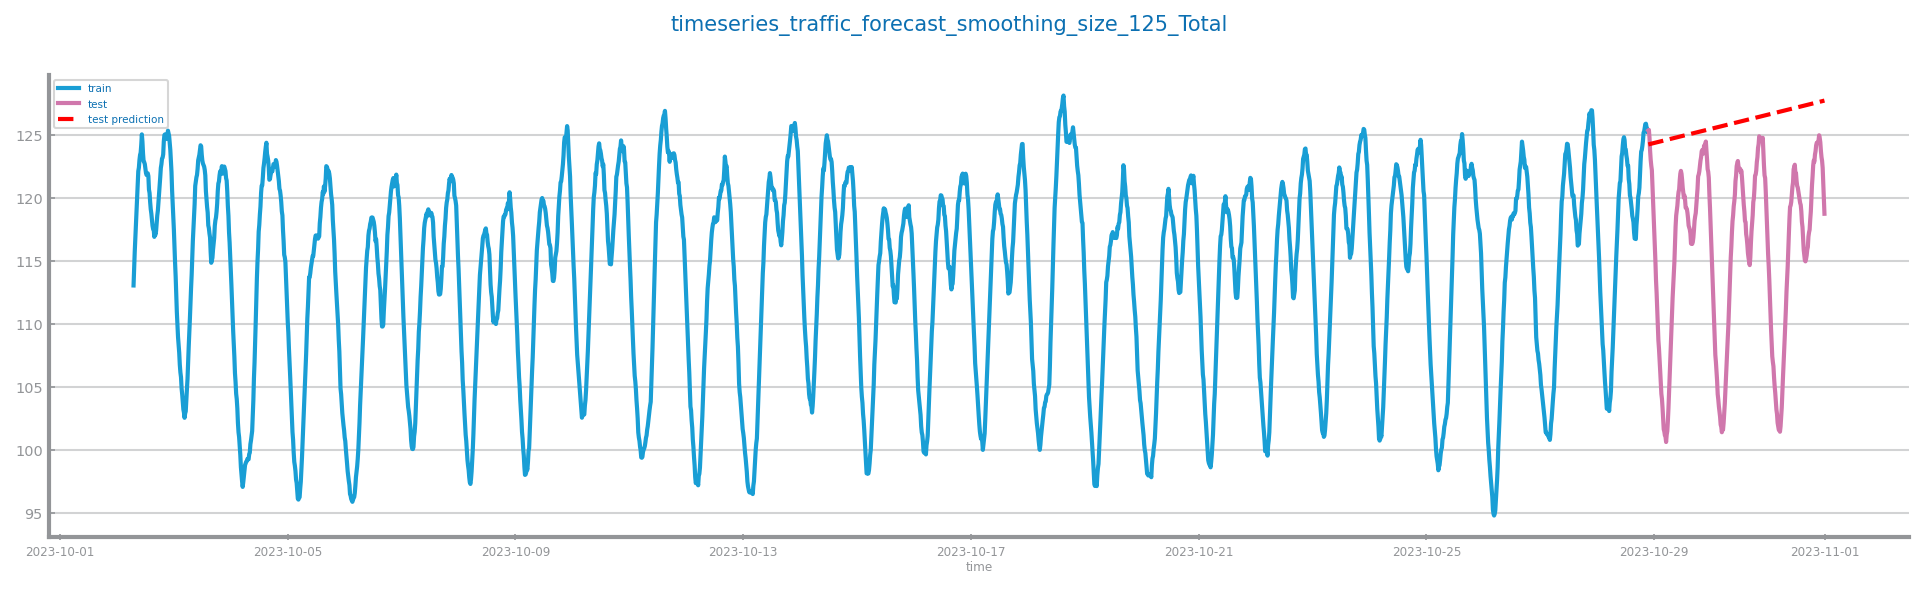

<Figure size 1800x300 with 0 Axes>

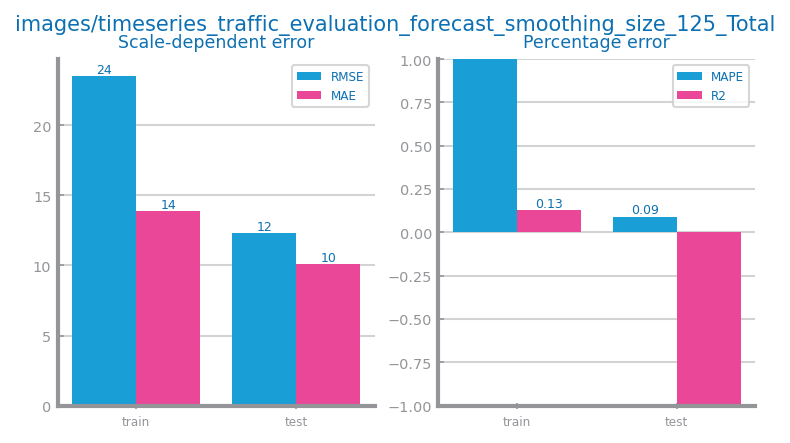

<Figure size 1800x300 with 0 Axes>

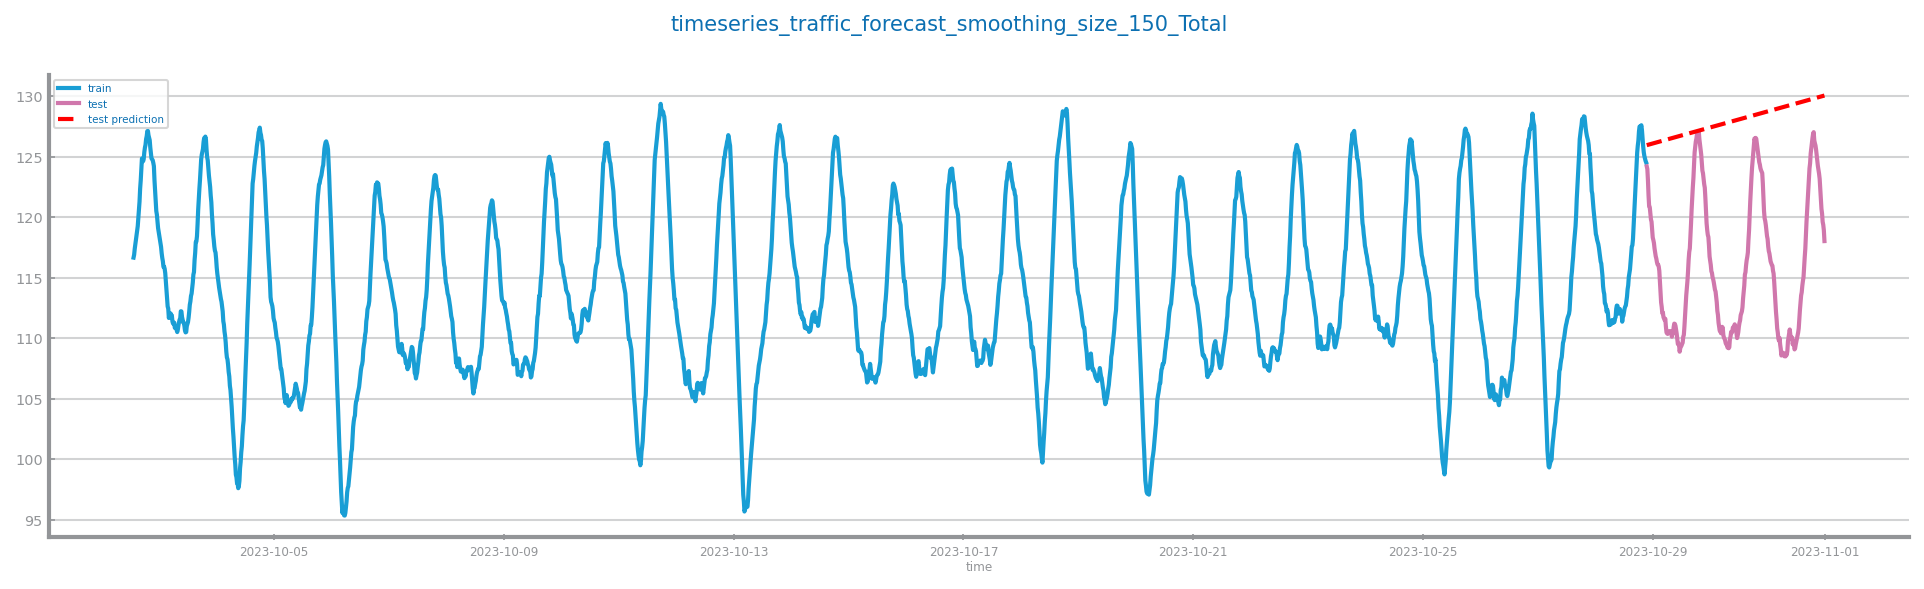

<Figure size 1800x300 with 0 Axes>

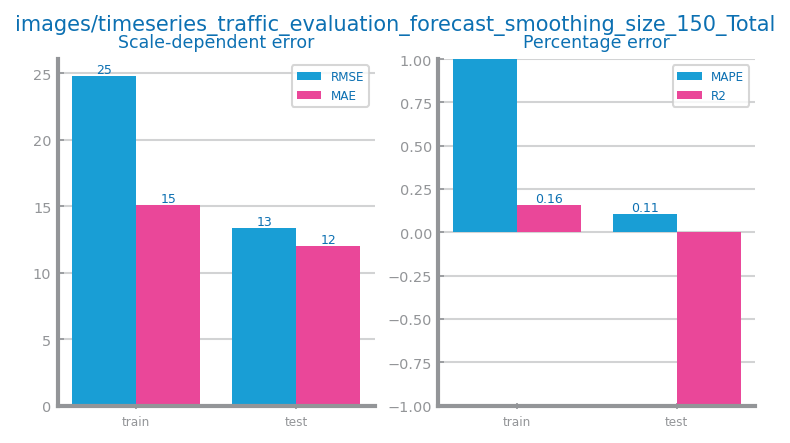

<Figure size 1800x300 with 0 Axes>

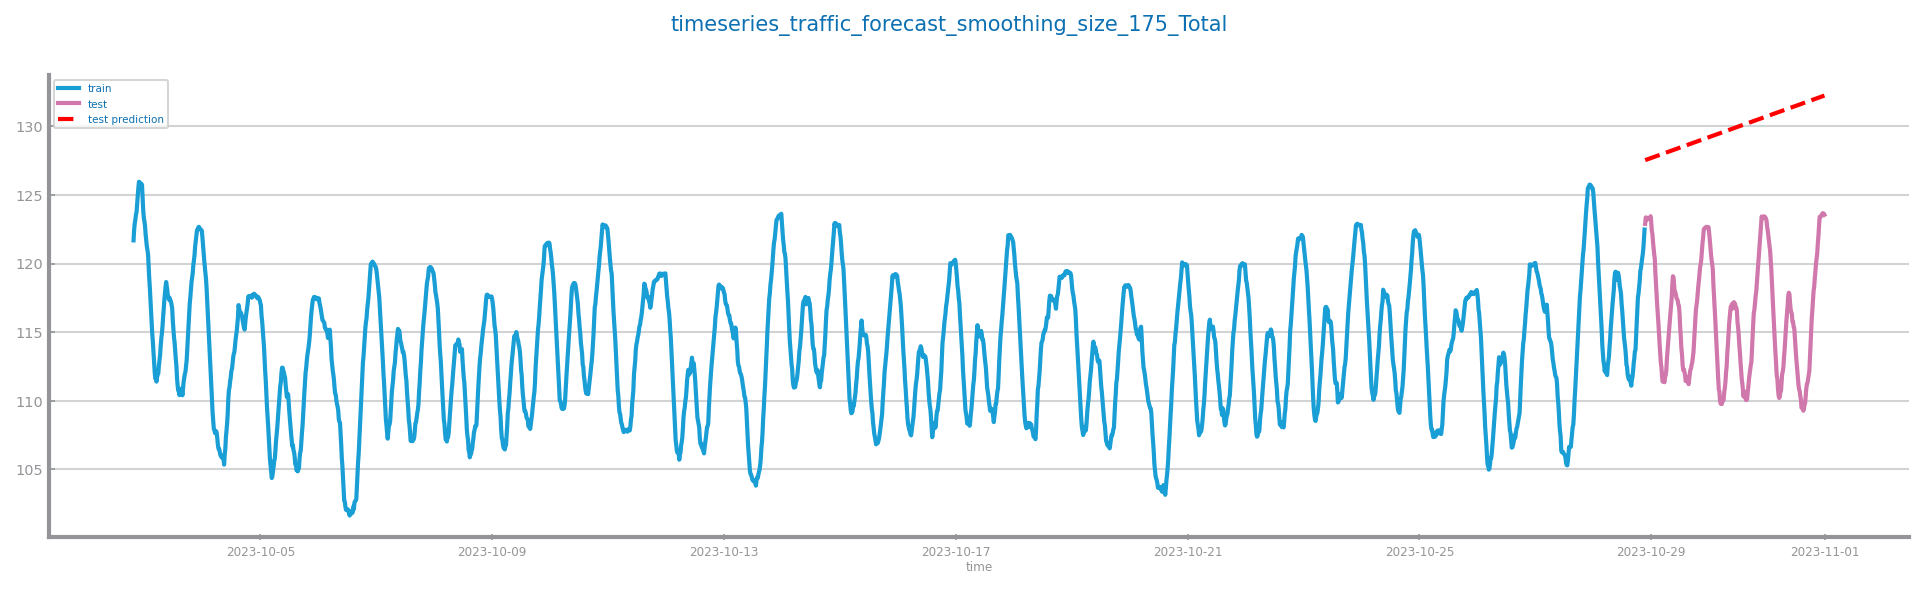

<Figure size 1800x300 with 0 Axes>

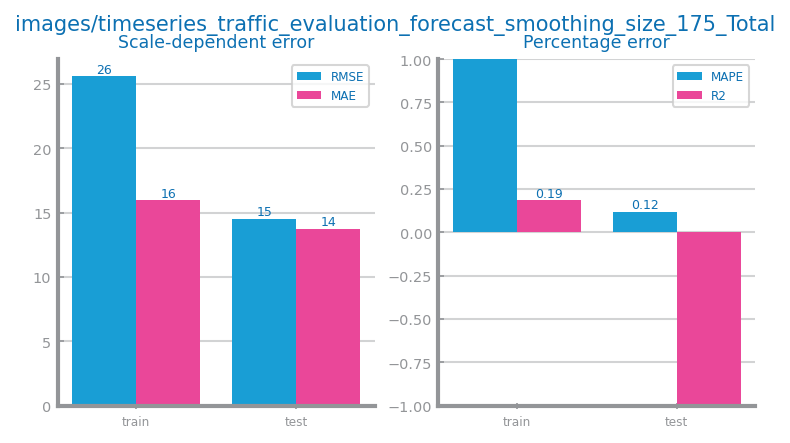

<Figure size 1800x300 with 0 Axes>

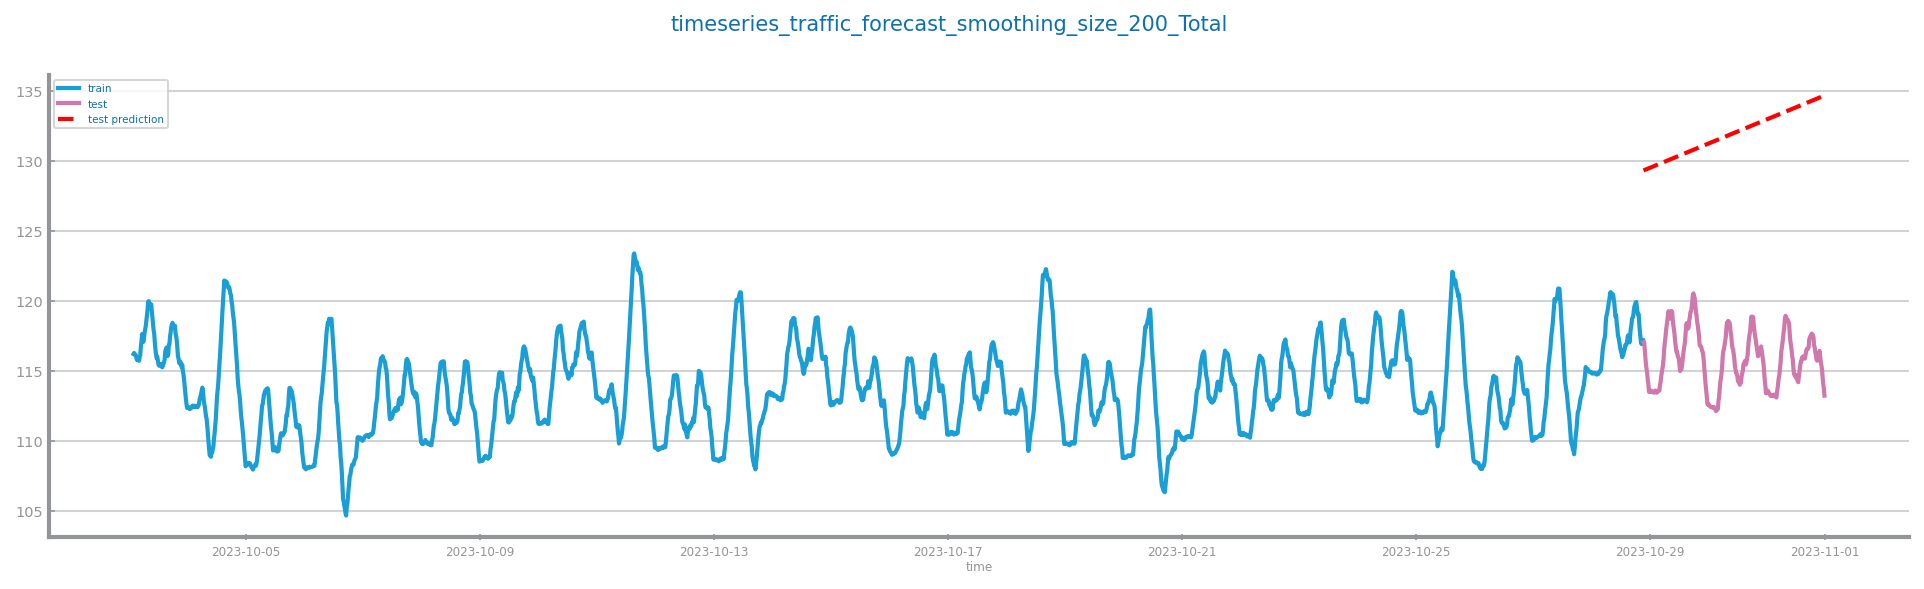

<Figure size 1800x300 with 0 Axes>

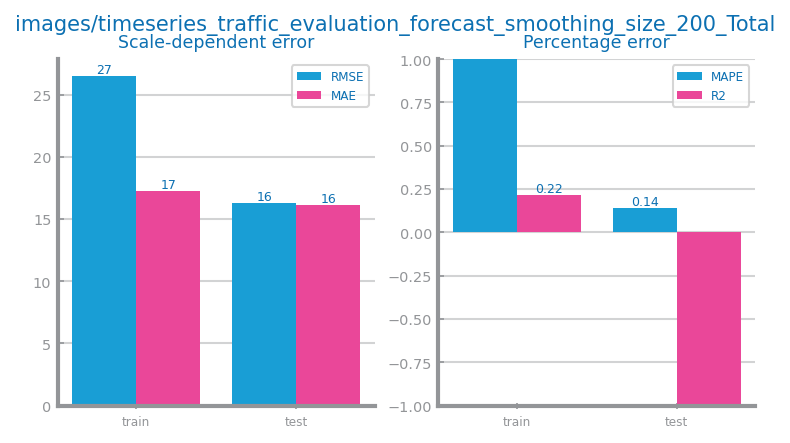

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from dslabs_functions import series_train_test_split
import pandas as pd
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT, plot_forecasting_series, plot_forecasting_eval
import numpy as np
from matplotlib.pyplot import subplots



sizes: list[int] = [2, 5, 10, 15, 20, 25, 50, 75, 100, 125, 150, 175, 200]

file_tag = "timeseries_traffic"
target = "Total"
data: DataFrame = read_csv(
    "../../../data/forecast_traffic_single.csv",
    index_col="Timestamp",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
fig, axs = subplots(len(sizes), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(sizes)))
for i in range(len(sizes)):
    series: Series = data[target]
    ss_smooth: Series = series.rolling(window=sizes[i]).mean()


    # Assuming 'series' is your time series data
    train_series, test_series = series_train_test_split(ss_smooth)


    # Creating the predictor variable (X) - using timestamps directly
    X_train = train_series.index.values.astype('datetime64[s]').astype(int).reshape(-1, 1)
    X_test = test_series.index.values.astype('datetime64[s]').astype(int).reshape(-1, 1)

    # Reshape the target variable (y)
    y_train = train_series.values
    y_test = test_series.values
    y_train = np.nan_to_num(y_train, nan=0)
    # Initializing and fitting the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)

    future_timestamps = test_series.index  # Change this to your future timestamps

    # Creating a pandas Series for the forecasted values with the corresponding timestamps
    forecast_test = pd.Series(predictions_test.flatten(), index=future_timestamps)

    figure(figsize=(3 * HEIGHT, HEIGHT / 2))
    plot_forecasting_series(
        trn=train_series,
        tst=test_series,
        prd_tst=forecast_test,
        title=f"{file_tag}_forecast_smoothing_size_{sizes[i]}_{target}",
    )
    plt.savefig(f"images/{file_tag}_forecast_smoothing_size_{sizes[i]}_{target}")
    show()
    figure(figsize=(3 * HEIGHT, HEIGHT / 2))
    plot_forecasting_eval(
    trn=np.nan_to_num(train_series, nan=0),
    tst=test_series,
    prd_trn=predictions_train,
    prd_tst=predictions_test,
    title=f"images/{file_tag}_evaluation_forecast_smoothing_size_{sizes[i]}_{target}"
    )
    plt.savefig(f"images/{file_tag}_evaluation_forecast_smoothing_size_{sizes[i]}_{target}")

    show()
